Results evaluation for the (1 + 1) - ES

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set(font = "arial")

_mu = "\u03BC"
_lam = "\u03BB"
_sig = "\u03C3"


μ


Compare convergence of the functions

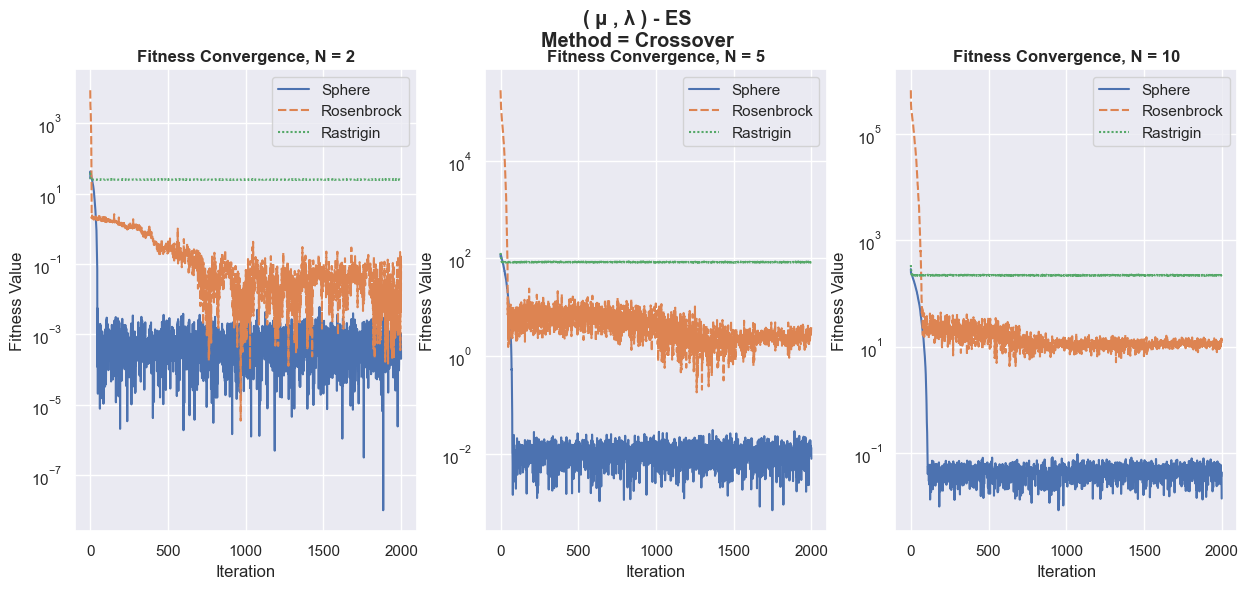

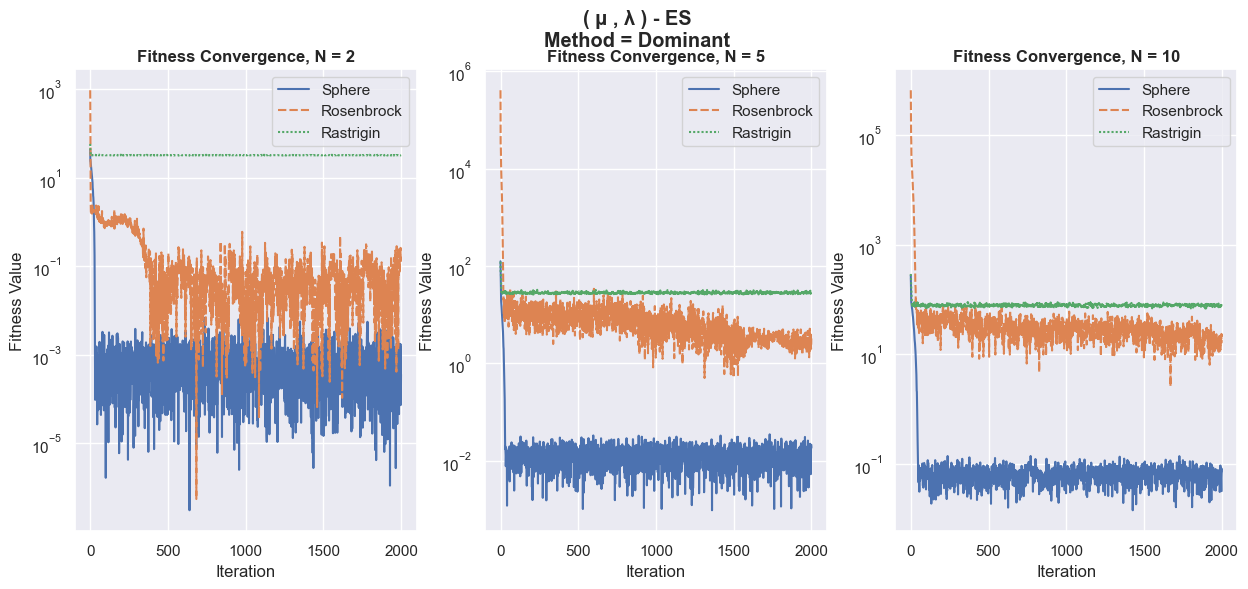

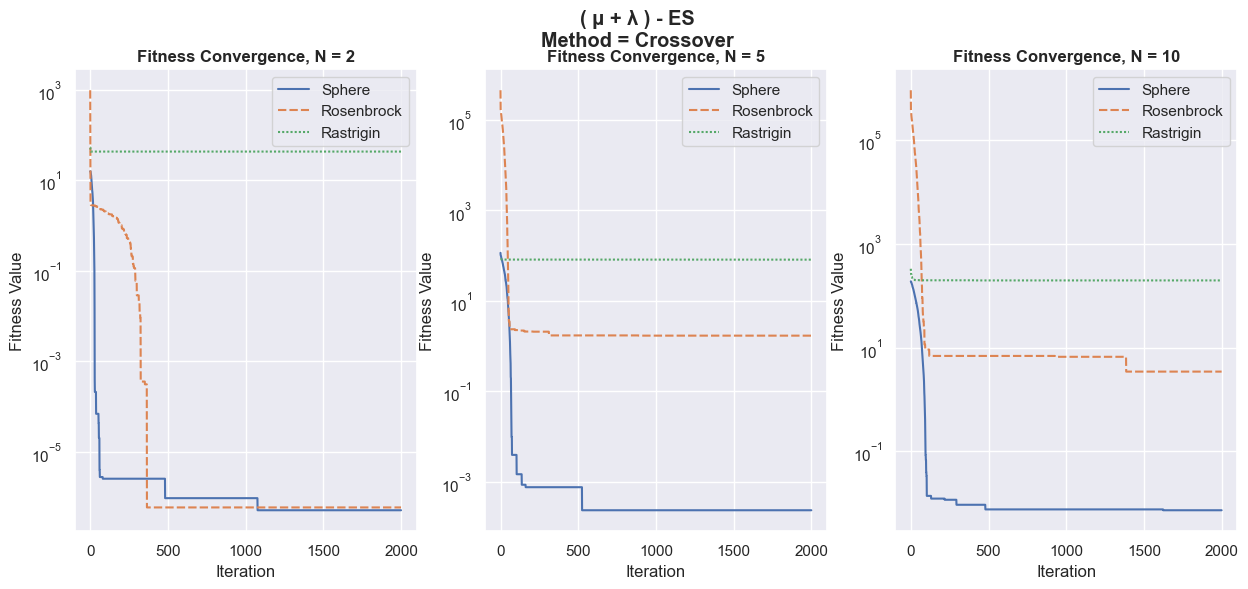

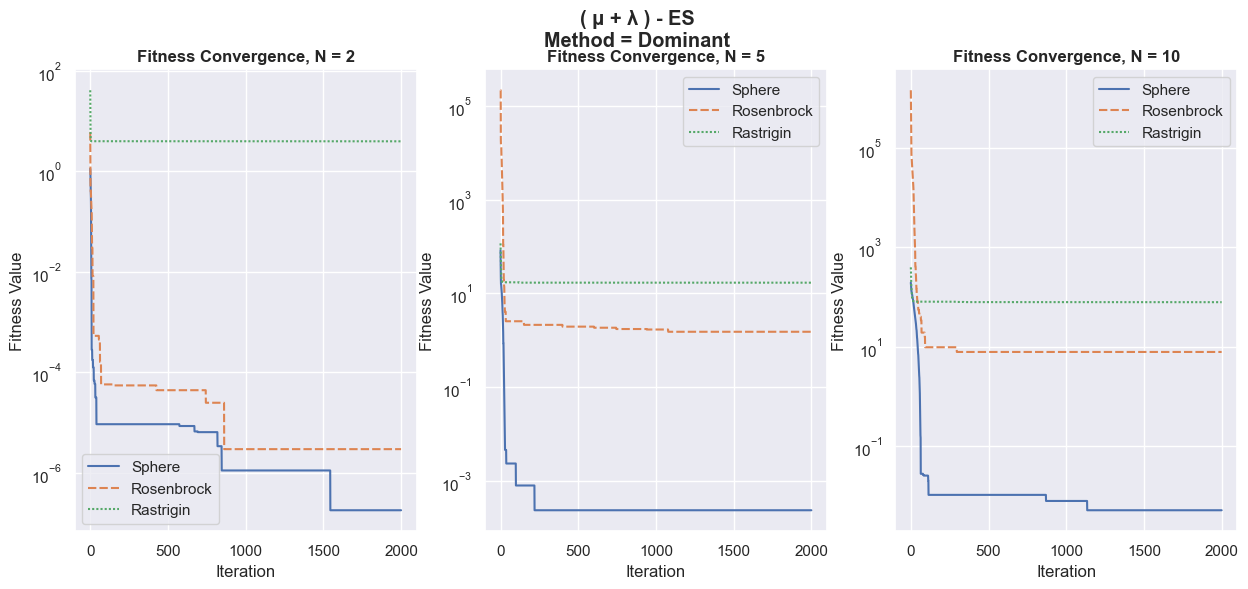

In [13]:

df_r = pd.DataFrame()
FUNC_NAMES=["Sphere","Rosenbrock", "Rastrigin"]
METHOD = ["c", "p"]
COMB = ["cros", "dom"]
for m, co in [(z, w) for z in METHOD for w in COMB]:
    fig,axs = plt.subplots(1,3, figsize = (15,6))
    me = "," if m == "c" else "+"
    combi = "Crossover" if co =="cros" else "Dominant"
    fig.suptitle(f"( {_mu} {me} {_lam} ) - ES" + "\n" +f"Method = {combi}",
                  fontweight= "bold")
    i=0
    for n in [2,5,10]:
        ax= axs[i]
        i+=1
        df_r = pd.DataFrame()
        for f in [0,1,2]:
            path = os.path.join(os.getcwd(), "mu_lam_es", 
                                 f"mu_lam_es_F_{f}_n_{n}_m_{m}_c_{co}.csv")
            df = pd.read_csv(path)
            df_r[FUNC_NAMES[f]] = df["fitness_best"]
            
        ax = sns.lineplot(data=df_r, ax= ax)
        ax.set_yscale("log")
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Fitness Value")
        ax.set_title(f"Fitness Convergence, N = {n}", fontweight = "bold")
    fig.show()